In [151]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [218]:
data_frame_bi_exc =   pd.read_excel("Data_Cleaning.xlsx") 
data_frame_bi_exc.head()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Class,Sub-Class,Product Name,Sales,Quantity,Profit,Shipping Cost
0,CA-2018-AB10015140-41954,2018-11-11,43417.0,AB-100151402,Amol Bose,Technology,Phones,Samsung Convoy 3,221.980,2,62.1544,40.77
1,IN-2018-JR162107-41675,2018-02-05,43138.0,JR-162107,Justin Ritter,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,-288.7650,923.63
2,IN-2018-CR127307-41929,2018-10-17,43391.0,CR-127307,Craig Reiter,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,919.9710,915.49
3,ES-2018-KM1637548-41667,2018-01-28,43130.0,KM-1637548,Katherine Murray,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,-96.5400,910.16
4,SG-2018-RH9495111-41948,2018-11-05,43410.0,RH-9495111,Rick Hansen,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,311.5200,903.04


In [219]:
data_frame_bi_exc.tail()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Class,Sub-Class,Product Name,Sales,Quantity,Profit,Shipping Cost
995,IT-2019-AR1082545-42290,2019-10-13,43754.0,AR-1082545,Anthony Rawles,Technology,Machines,"Konica Printer, Durable",1138.8300,5,187.5300,179.69
996,IN-2016-BM1178558-41124,NaT,42589.0,BM-1178558,Bryan Mills,Furniture,Bookcases,"Bush Library with Doors, Metal",1455.1200,4,116.4000,179.62
997,ES-2019-JH1582045-42256,2019-09-09,43719.0,JH-1582045,John Huston,Technology,Copiers,"Hewlett Copy Machine, Color",676.0305,3,151.0605,179.62
998,IN-2019-HD1478527-42327,2019-11-19,43793.0,HD-1478527,Harold Dahlen,Furniture,Bookcases,"Bush Classic Bookcase, Metal",2060.7000,5,886.0500,179.50
999,CA-2016-AB10255140-41111,2016-07-21,42578.0,AB-102551404,NaN,Office Supplies,Art,Crayola Colored Pencils,19.6800,6,6.4944,1.37


In [220]:
n, p= data_frame_bi_exc.shape 
shape =  {"rows" :  n  ,  "columns" :  p } 
print(shape) 

{'rows': 1000, 'columns': 12}


In [221]:
#check for messing value  
data_frame_bi_exc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       998 non-null    object        
 1   Order Date     996 non-null    datetime64[ns]
 2   Ship Date      998 non-null    float64       
 3   Customer ID    1000 non-null   object        
 4   Customer Name  996 non-null    object        
 5   Class          997 non-null    object        
 6   Sub-Class      1000 non-null   object        
 7   Product Name   996 non-null    object        
 8   Sales          997 non-null    float64       
 9   Quantity       1000 non-null   int64         
 10  Profit         993 non-null    float64       
 11  Shipping Cost  995 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 93.9+ KB


In [222]:
#check for uniqie value    
reference_columns = []
for col  in data_frame_bi_exc: 
    print(col , len (data_frame_bi_exc[col].unique())) 
    if  len (data_frame_bi_exc[col].unique())<20: 
        reference_columns.append(col)


Order ID 856
Order Date 543
Ship Date 558
Customer ID 797
Customer Name 499
Class 5
Sub-Class 18
Product Name 552
Sales 949
Quantity 14
Profit 954
Shipping Cost 966


In [223]:
data_frame_bi_exc.describe()

,Ship Date,Sales,Quantity,Profit,Shipping Cost
count,998.000000,997.000000,1000.000000,993.000000,995.000000
mean,43326.191383,1616.051799,5.427000,286.958921,252.140727
std,429.449962,1245.706200,2.681018,555.613253,173.940195
min,42378.000000,1.908000,1.000000,-3059.820000,1.070000
25%,43140.000000,755.805360,3.000000,10.395000,185.215000
50%,43444.000000,1440.840000,5.000000,181.651200,234.130000
75%,43685.750000,2301.138000,7.000000,511.095000,325.180000
max,43833.000000,9892.740000,14.000000,4946.370000,923.630000


In [224]:
data_frame_bi_exc.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date               float64
Customer ID              object
Customer Name            object
Class                    object
Sub-Class                object
Product Name             object
Sales                   float64
Quantity                  int64
Profit                  float64
Shipping Cost           float64
dtype: object

In [225]:
#check null values
print(data_frame_bi_exc.isna().sum()) 

Order ID         2
Order Date       4
Ship Date        2
Customer ID      0
Customer Name    4
Class            3
Sub-Class        0
Product Name     4
Sales            3
Quantity         0
Profit           7
Shipping Cost    5
dtype: int64


In [226]:
#drop nan rows 
for col in data_frame_bi_exc:
    data_frame_bi_exc = data_frame_bi_exc[data_frame_bi_exc[col].notna()]
len(data_frame_bi_exc.isna()) 
data_frame_bi_exc.reset_index(drop=True, inplace=True) 
data_frame_bi_exc.head(1)

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Class,Sub-Class,Product Name,Sales,Quantity,Profit,Shipping Cost
0,CA-2018-AB10015140-41954,2018-11-11,43417.0,AB-100151402,Amol Bose,Technology,Phones,Samsung Convoy 3,221.98,2,62.1544,40.77


### Visualisation
1. Serrching for periodic visualisations 


In [266]:
#create 

data_frame_bi_exc["period"] = pd.DatetimeIndex(data_frame_bi_exc["Order Date"]).month 
data_frame_bi_exc["year"] = pd.DatetimeIndex(data_frame_bi_exc["Order Date"]).year 
data_frame_bi_exc["New_order_date"]  = pd.to_datetime(data_frame_bi_exc["year"].astype(str)+"-"+data_frame_bi_exc["period"].astype(str)+"-1")    
data_frame_bi_exc=data_frame_bi_exc.drop('period',  axis='columns') 
data_frame_bi_exc= data_frame_bi_exc.drop('year',  axis='columns')   
data_frame_bi_exc.head(2)  


#'''creating periodic time column '''




,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Class,Sub-Class,Product Name,Sales,Quantity,Profit,Shipping Cost,New_order_date
0,CA-2018-AB10015140-41954,2018-11-11,43417.0,AB-100151402,Amol Bose,Technology,Phones,Samsung Convoy 3,221.980,2,62.1544,40.77,2018-11-01
1,IN-2018-JR162107-41675,2018-02-05,43138.0,JR-162107,Justin Ritter,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,-288.7650,923.63,2018-02-01


In [250]:
#checking New_order_date type
data_frame_bi_exc.dtypes

Order ID                  object
Order Date        datetime64[ns]
Ship Date                float64
Customer ID               object
Customer Name             object
Class                     object
Sub-Class                 object
Product Name              object
Sales                    float64
Quantity                   int64
Profit                   float64
Shipping Cost            float64
New_order_date    datetime64[ns]
dtype: object

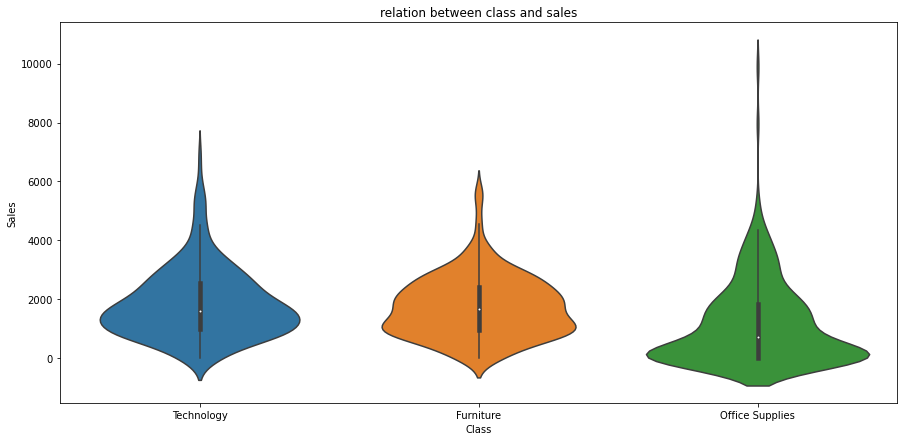

In [238]:

plt.figure(figsize=(15,7)) 
sns.violinplot(x="Class" , y="Sales",  data=data_frame_bi_exc).set_title('relation between class and sales')  
plt.show()
#visualisation of sales per Sub-Class with violin 

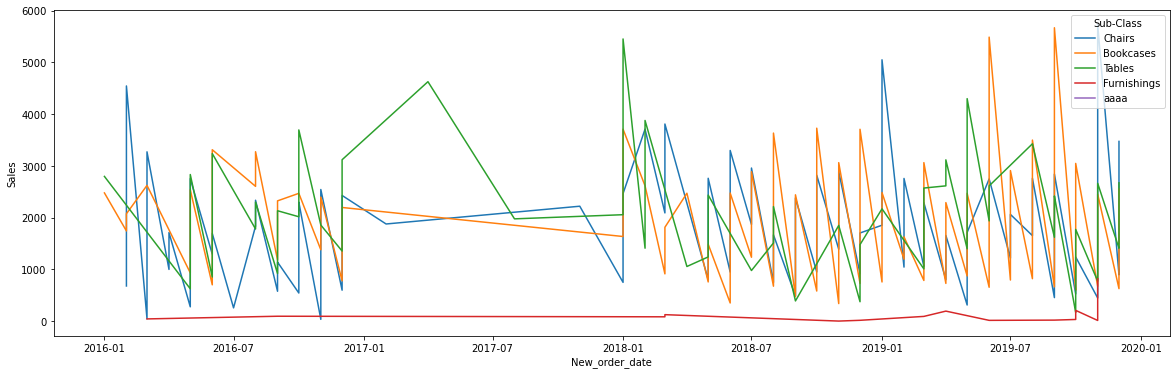

In [261]:
#taking Funiture as exemple  
plt.figure(figsize=(20,6 ))
sns.lineplot(x="New_order_date" ,y="Sales" ,hue ="Sub-Class", estimator= None,   data=data_frame_bi_exc[data_frame_bi_exc["Class"]=="Furniture"]) 
plt.show()

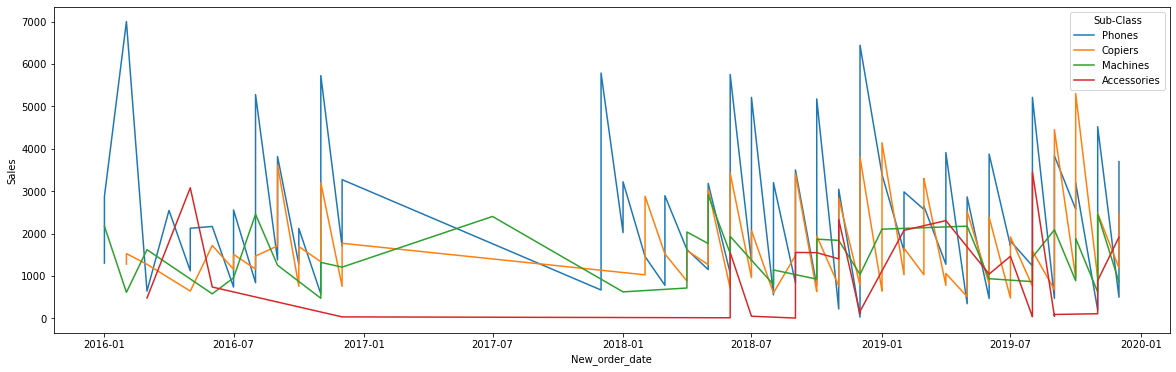

In [262]:
#taking Technology as exemple  
plt.figure(figsize=(20,6 ))
sns.lineplot(x="New_order_date" ,y="Sales" ,hue ="Sub-Class", estimator= None,   data=data_frame_bi_exc[data_frame_bi_exc["Class"]=="Technology"]) 
plt.show()

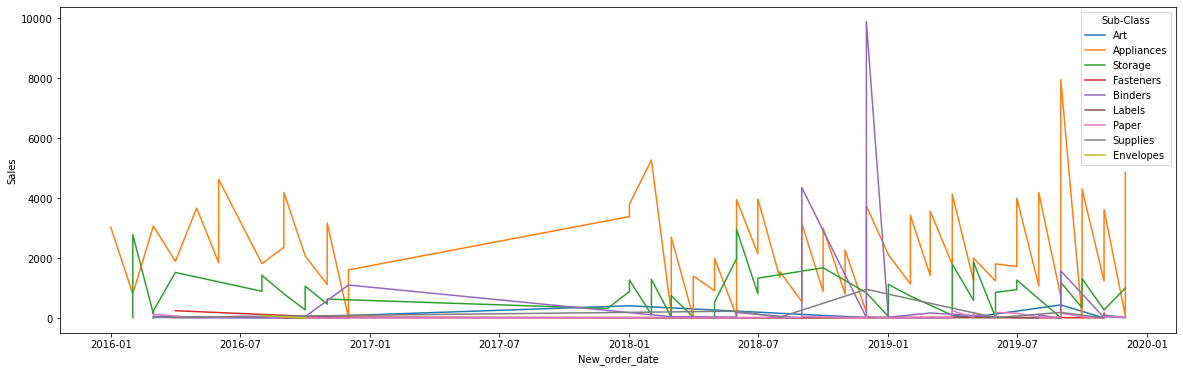

In [265]:
#taking Office Supplies as exemple  
plt.figure(figsize=(20,6 ))
sns.lineplot(x="New_order_date" ,y="Sales" ,hue ="Sub-Class", estimator= None,   data=data_frame_bi_exc[data_frame_bi_exc["Class"]=="Office Supplies"]) 
plt.show()